In [8]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
import pandas as pd

users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")
books = pd.read_csv("Books.csv")

In [5]:
len(ratings), len(users), len(books)

(1149780, 278858, 271360)

Number of unique books in the ratings dataset: 340556


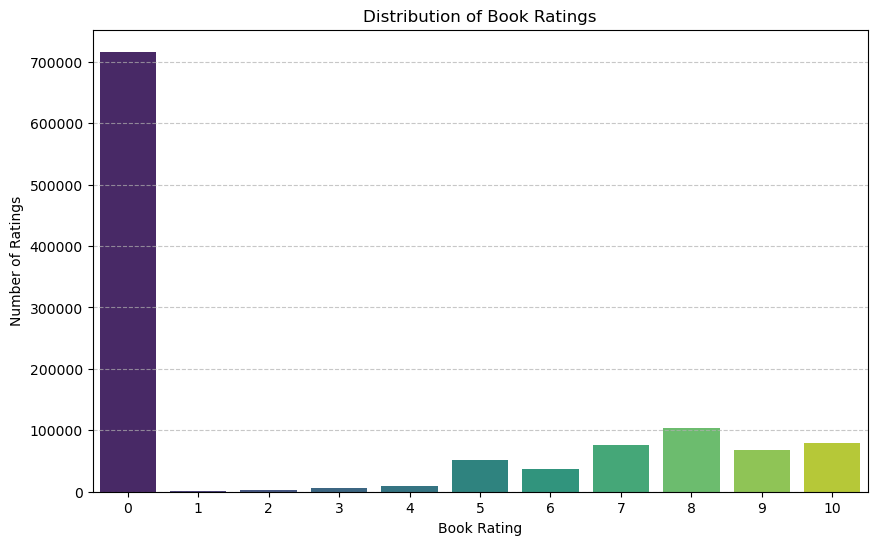

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribution of ratings
rating_distribution = ratings['Book-Rating'].value_counts().sort_index()
#print("\nDistribution of ratings:")
#display(rating_distribution)

# Create a bar plot for the rating distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette='viridis')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
from babel.numbers import format_decimal

In [22]:
# number of unique books 
num_unique_books = ratings['ISBN'].nunique()

# Number of books with a 0 rating
zero_ratings_count = ratings[ratings['Book-Rating'] == 0].shape[0]
# Number of ratings
total_ratings_count = ratings.shape[0]

# Calculate the percentage of books with a 0 rating
percentage_zero_ratings = (zero_ratings_count / total_ratings_count) * 100

print("No of ratings:", format_decimal(total_ratings_count, locale='de_DE'))
print(f"% books with a 0 rating: {percentage_zero_ratings:.2f}%")
print(f"Number of unique books in the ratings dataset: {format_decimal(num_unique_books, locale='de_DE')}")

No of ratings: 1.149.780
% books with a 0 rating: 62.28%
Number of unique books in the ratings dataset: 340.556


In [24]:
# Find the ISBNs in ratings that are not in books
ratings_isbns = ratings['ISBN'].unique()
books_isbns = books['ISBN'].unique()
isbns_not_in_books = set(ratings_isbns) - set(books_isbns)
count_isbns_not_in_books = len(isbns_not_in_books)

if count_isbns_not_in_books > 0:
    print(f"There are {count_isbns_not_in_books} ISBNs in the ratings dataset that do not exist in the books dataframe.")
else:
    print("All ISBNs in the ratings dataset also exist in the books dataframe.")

There are 70405 ISBNs in the ratings dataset that do not exist in the books dataframe.


## Missing values

In [26]:
print("Information for the 'books' DataFrame:")
print(f"Total number of rows: {books.shape[0]}")
print("Missing values:")
display(books.isna().sum())

# Check for missing values and display total rows in the 'ratings' DataFrame
print("\nInformation for the 'ratings' DataFrame:")
print(f"Total number of rows: {ratings.shape[0]}")
print("Missing values:")
display(ratings.isna().sum())

# Check for missing values and display total rows in the 'users' DataFrame
print("\nInformation for the 'users' DataFrame:")
print(f"Total number of rows: {users.shape[0]}")
print("Missing values:")
display(users.isna().sum())

Information for the 'books' DataFrame:
Total number of rows: 271360
Missing values:


ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


Information for the 'ratings' DataFrame:
Total number of rows: 1149780
Missing values:


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


Information for the 'users' DataFrame:
Total number of rows: 278858
Missing values:


User-ID          0
Location         0
Age         110762
dtype: int64

In [30]:
missing_age_users = users[users['Age'].isna()]
print(f"\nTotal number of rows with missing 'Age': {missing_age_users.shape[0]}")
print(f"\n% Users missing 'Age': {(missing_age_users.shape[0]/len(users))*100:.2f}%")


Total number of rows with missing 'Age': 110762

% Users missing 'Age': 39.72%


In [32]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


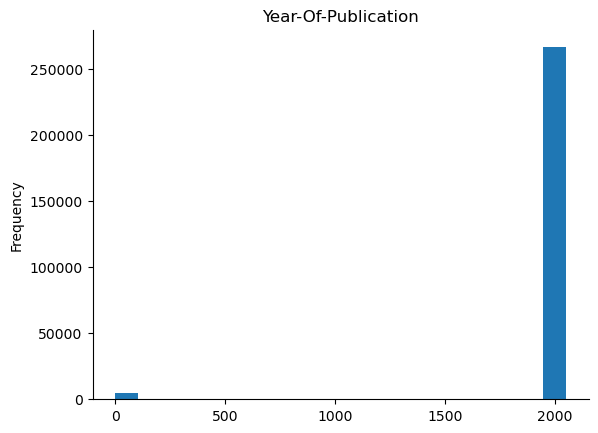

In [33]:
# @title Year-Of-Publication

from matplotlib import pyplot as plt
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books['Year-Of-Publication'].plot(kind='hist', bins=20, title='Year-Of-Publication')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [35]:
# Merge ratings with books on 'ISBN'
ratings_books = pd.merge(ratings, books, on='ISBN', how='left')

# Merge the result with users on 'User-ID'
ratings_all = pd.merge(ratings_books, users, on='User-ID', how='left')

display(ratings_all.head())



,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


In [39]:
all_users = users['User-ID'].unique()

# Get the unique User-IDs from the ratings DataFrame
users_with_ratings = ratings['User-ID'].unique()
users_without_ratings = set(all_users) - set(users_with_ratings)

# Calculate the percentage of users without ratings
percentage_users_without_ratings = (len(users_without_ratings) / len(all_users)) * 100


# Check if all users have at least one rating
if len(users_without_ratings) == 0:
    print("All users have at least one rating.")
else:
    print(f"Number of users without any ratings: {len(users_without_ratings)} from all users: {len(all_users)}")
    print(f"Percentage of users w/o rating: {percentage_users_without_ratings:.2f}%")

Number of users without any ratings: 173575 from all users: 278858
Percentage of users w/o rating: 62.24%


In [46]:
# Calculate the number of ratings per book
ratings_count_per_book = ratings['ISBN'].value_counts().reset_index()
ratings_count_per_book.columns = ['ISBN', 'rating_count']
# Merge with the books DataFrame to add book title and author
ratings_count_per_book = pd.merge(ratings_count_per_book, books[['ISBN', 'Book-Title', 'Book-Author']], on='ISBN', how='left')

print("Distribution of the number of ratings per book with book details:")
display(ratings_count_per_book[:15]) # Display the top books with most ratings


Distribution of the number of ratings per book with book details:


,ISBN,rating_count,Book-Title,Book-Author
0,0971880107,2502,Wild Animus,Rich Shapero
1,0316666343,1295,The Lovely Bones: A Novel,Alice Sebold
2,0385504209,883,The Da Vinci Code,Dan Brown
3,0060928336,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells
4,0312195516,723,The Red Tent (Bestselling Backlist),Anita Diamant
5,044023722X,647,A Painted House,John Grisham
6,0679781587,639,NaN,NaN
7,0142001740,615,The Secret Life of Bees,Sue Monk Kidd
8,067976402X,614,Snow Falling on Cedars,David Guterson
9,0671027360,586,Angels &amp; Demons,Dan Brown


In [47]:
isbn_to_check = '0679781587'

if isbn_to_check in isbns_not_in_books:
    print(f"Yes, the ISBN '{isbn_to_check}' is present in the ratings dataset but does not exist in the books dataframe.")
    print("This is why it has missing title and author information in the ratings_count_per_book dataframe.")
else:
    print(f"No, the ISBN '{isbn_to_check}' exists in both the ratings and books dataframes.")

Yes, the ISBN '0679781587' is present in the ratings dataset but does not exist in the books dataframe.
This is why it has missing title and author information in the ratings_count_per_book dataframe.


## Multi-edition books
- They pollute the results for content based filtering
- Try to fill missing rating with ratings from other editions

In [87]:
# Normalize Book-Title and Book-Author by converting to lowercase and stripping whitespace
books['Book-Title_normalized'] = books['Book-Title'].str.lower().str.strip()
books['Book-Author_normalized'] = books['Book-Author'].str.lower().str.strip()

# Group by normalized Title and Author and count the number of unique ISBNs
editions_count = books.groupby(['Book-Title_normalized', 'Book-Author_normalized'])['ISBN'].nunique().reset_index()

# Rename the ISBN column to 'editions' for clarity
editions_count = editions_count.rename(columns={'ISBN': 'editions'})

# Sort by the number of editions in descending order
editions_count = editions_count.sort_values(by='editions', ascending=False)

# Display the head of the new DataFrame
print("DataFrame showing the number of editions per book (based on normalized Title and Author):")
display(editions_count.head())

# books = books.drop(columns=['Book-Title_normalized', 'Book-Author_normalized'])

DataFrame showing the number of editions per book (based on normalized Title and Author):


,Book-Title_normalized,Book-Author_normalized,editions
112601,little women,louisa may alcott,23
246041,wuthering heights,emily bronte,22
9633,adventures of huckleberry finn,mark twain,20
147877,pride and prejudice,jane austen,19
213920,the secret garden,frances hodgson burnett,17


In [94]:
# Group the books DataFrame by normalized title and author and aggregate ISBNs into a list
isbn_list_per_edition = books.groupby(['Book-Title_normalized', 'Book-Author_normalized'])['ISBN'].agg(list).reset_index()

# Rename the 'ISBN' column to 'isbn_list' for clarity
isbn_list_per_edition = isbn_list_per_edition.rename(columns={'ISBN': 'isbn_list'})

# Merge this information with the multi_edition_books DataFrame
multi_edition_books = pd.merge(multi_edition_books, isbn_list_per_edition, on=['Book-Title_normalized', 'Book-Author_normalized'], how='left')

# Display the head of the updated multi_edition_books DataFrame
print("Head of the multi_edition_books DataFrame with the list of ISBNs:")
display(multi_edition_books.head())

Head of the multi_edition_books DataFrame with the list of ISBNs:


,Book-Title_normalized,Book-Author_normalized,editions,isbn_list
0,little women,louisa may alcott,23,"[0861782356, 0671517643, 0590203509, 044044768..."
1,wuthering heights,emily bronte,22,"[0553212583, 0553211412, 0812505166, 055321021..."
2,adventures of huckleberry finn,mark twain,20,"[0835902242, 059043389X, 0451519124, 045152373..."
3,pride and prejudice,jane austen,19,"[055321215X, 0553213105, 0451523652, 156619093..."
4,the secret garden,frances hodgson burnett,17,"[0812505018, 006440188X, 0440977096, 087923649..."


In [105]:
# Filter editions_count to get books with more than one edition
multi_edition_books = editions_count[editions_count['editions'] > 1]

In [90]:
len(multi_edition_books)

17554

In [97]:
len(multi_edition_books)/num_unique_books

0.05154512033263252

In [107]:
#TBD: find books with multieditions in ratings and have 0 rating. Check whether other editions have other ratings than 0 and map an average inseatd

In [109]:
#remove multi-edition duplicates from content-based filtering dataset

In [110]:
# Build a canonical key: lowercase stripped title + author
books["canon_key"] = (
    books["Book-Title"].astype(str).str.strip().str.lower() + "||" +
    books["Book-Author"].astype(str).str.strip().str.lower()
)

# Drop duplicates so each (title, author) appears only once
books_dedup = books.drop_duplicates(subset=["canon_key"]).copy()

print("Original books:", books.shape)
print("After dedup (unique title+author):", books_dedup.shape)

Original books: (271360, 9)
After dedup (unique title+author): (248239, 9)


In [111]:
books_dedup.to_csv('books_dedup.csv')

## Users with at least 5 ratings

In [115]:
# Count ratings per user (non-zero only if you want to exclude implicit 'seen')
user_counts = (ratings[ratings["Book-Rating"] > 0]
               .groupby("User-ID")["Book-Rating"]
               .count()
               .reset_index(name="num_ratings"))

# Filter users with at least 5 ratings
eligible_users = user_counts[user_counts["num_ratings"] >= 5]

# Show 10 examples
print(len(eligible_users))
print(eligible_users.head(10))

14220
    User-ID  num_ratings
0         8            7
34       99            8
39      114            8
45      160            6
52      183           91
64      232            5
66      242           33
67      243           18
68      244            8
71      254           58


In [120]:
14220/len(users)

0.050993695716099234

In [116]:
# Merge ratings with book metadata
merged = ratings.merge(books[["ISBN","Book-Title","Book-Author"]],
                       on="ISBN", how="left")

# Find missing/empty title or author
mask_missing = merged["Book-Title"].isna() | merged["Book-Author"].isna() | \
               (merged["Book-Title"].astype(str).str.strip() == "") | \
               (merged["Book-Author"].astype(str).str.strip() == "")

num_missing = mask_missing.sum()
print("Number of ratings with empty/missing title or author:", num_missing)

# Optional: also show number of unique ISBNs affected
print("Unique books with missing metadata:", merged.loc[mask_missing, "ISBN"].nunique())


Number of ratings with empty/missing title or author: 118646
Unique books with missing metadata: 70407


## Language detection

In [103]:
# Install the language detection library
#%pip install langdetect

# Import the detect function
from langdetect import detect
import numpy as np

# Function to detect language, handling potential errors
def safe_detect_language(text):
    try:
        # Ensure the input is a string and not NaN
        if isinstance(text, str) and text.strip():
            return detect(text)
        else:
            return None # Return None for non-string or empty inputs
    except:
        return 'unknown' # Return 'unknown' for detection errors

books_LG = books['Book-Title'].apply(safe_detect_language)



In [ ]:
# Count the occurrences of each detected language
language_counts = books['detected_language'].value_counts()

non_english_count = language_counts[language_counts.index != 'en'].sum()

# Calculate the total number of books in the sample that had a detectable language
total_detectable_language_count = language_counts.sum()

total_non_english_books = (non_english_count / total_detectable_language_count) * len(books) if total_detectable_language_count > 0 else 0

print(f"\nEstimated number of non-English books in the dataset: {int(estimated_total_non_english_books)}")

In [100]:
books.head()

0    en
1    it
2    en
3    en
4    en
Name: Book-Title, dtype: object

## Users with non-zero ratings

In [117]:
# Filter the ratings DataFrame to include only non-zero ratings
nonzero_ratings = ratings[ratings['Book-Rating'] != 0]

# Get the unique User-IDs from the non-zero ratings DataFrame
users_with_nonzero_ratings = nonzero_ratings['User-ID'].unique()

# Get the total number of unique User-IDs from the users DataFrame
total_users_count = users['User-ID'].nunique()

# Count the number of users with at least one non-zero rating
users_with_nonzero_ratings_count = len(users_with_nonzero_ratings)

# Calculate the percentage of users with at least one non-zero rating
percentage_users_with_nonzero_ratings = (users_with_nonzero_ratings_count / total_users_count) * 100

print(f"Total number of users: {total_users_count}")
print(f"Number of users with at least one non-zero rating: {users_with_nonzero_ratings_count}")
print(f"Percentage of users with at least one non-zero rating: {percentage_users_with_nonzero_ratings:.2f}%")

Total number of users: 278858
Number of users with at least one non-zero rating: 77805
Percentage of users with at least one non-zero rating: 27.90%


In [121]:
overall_zero_share = (ratings["Book-Rating"] == 0).mean()
print("Overall % of ratings that are 0:", overall_zero_share)

# for each user: proportion of 0 ratings
user_zero_share = (ratings["Book-Rating"] == 0).groupby(ratings["User-ID"]).mean()

# check how many users have only 0 ratings
users_all_zero = (user_zero_share == 1.0).sum()
print("Number of users with all ratings = 0:", users_all_zero)

# % of users with all 0s
print("Percent of users with only 0 ratings:", users_all_zero / user_zero_share.shape[0])

Overall % of ratings that are 0: 0.6228226269373272
Number of users with all ratings = 0: 27478
Percent of users with only 0 ratings: 0.260991803045126


In [123]:
# Ensure numeric rating
ratings["Book-Rating"] = pd.to_numeric(ratings["Book-Rating"], errors="coerce")

# For each user: count total ratings, count nonzero ratings
agg = ratings.groupby("User-ID")["Book-Rating"].agg(
    total_ratings="count",
    nonzero_ratings=lambda x: (x > 0).sum()
)

# Users with all ratings = 0
users_all_zero = agg[agg["nonzero_ratings"] == 0]
print("Users with only 0 ratings:", users_all_zero.shape[0])

# Users with exactly one nonzero rating (and rest 0)
users_one_nonzero = agg[agg["nonzero_ratings"] == 1]
print("Users with exactly one nonzero rating:", users_one_nonzero.shape[0])

# --- Clean dataset by removing these users (best practice in recommender literature) ---
filtered_users = agg[(agg["nonzero_ratings"] > 1)]
ratings_filtered = ratings[ratings["User-ID"].isin(filtered_users.index)]

print("Original ratings:", ratings.shape)
print("Filtered ratings:", ratings_filtered.shape)

Users with only 0 ratings: 27478
Users with exactly one nonzero rating: 45382
Original ratings: (1149780, 3)
Filtered ratings: (1028402, 3)


In [124]:
# Merge ratings with book metadata
merged = ratings_filtered.merge(books[["ISBN","Book-Title","Book-Author"]],
                       on="ISBN", how="left")

# Find missing/empty title or author
mask_missing = merged["Book-Title"].isna() | merged["Book-Author"].isna() | \
               (merged["Book-Title"].astype(str).str.strip() == "") | \
               (merged["Book-Author"].astype(str).str.strip() == "")

num_missing = mask_missing.sum()
print("Number of ratings with empty/missing title or author:", num_missing)

# Optional: also show number of unique ISBNs affected
print("Unique books with missing metadata:", merged.loc[mask_missing, "ISBN"].nunique())

Number of ratings with empty/missing title or author: 96429
Unique books with missing metadata: 60882


In [125]:
# Filter out these rows
ratings_filtered = merged.loc[~mask_missing, ratings.columns]  # keep only original ratings cols

print("Original ratings:", ratings.shape)
print("Filtered ratings:", ratings_filtered.shape)

Original ratings: (1149780, 3)
Filtered ratings: (931973, 3)


In [ ]:
ratings_filtered.to_csv('ratings_filtered.csv')

In [126]:
# Count ratings per user (non-zero only if you want to exclude implicit 'seen')
user_counts = (ratings_filtered[ratings_filtered["Book-Rating"] > 0]
               .groupby("User-ID")["Book-Rating"]
               .count()
               .reset_index(name="num_ratings"))

# Filter users with at least 5 ratings
eligible_users = user_counts[user_counts["num_ratings"] >= 5]

# Show 10 examples
print(len(eligible_users))
print(eligible_users.head(10))

12787
    User-ID  num_ratings
0         8            7
10       99            8
11      114            8
13      183            5
16      242           22
17      243           18
18      244            8
19      254           57
24      300            8
29      383            7
